# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 📖 Background

Founded in 2020 during the Covid Pandemic, Tasty Bytes began as a recipe search engine, offering inspiration and ideas to utilize limited supplies at home. Today, it has evolved into a full-fledged business providing personalized meal plans for a healthy, balanced diet at any budget.



# 🎯 Project Goals

The product manager at Tasty Bytes wants to address the challenge of selecting popular recipes for the homepage, which has a significant impact on website traffic and subscriptions. They have requested a solution to predict high-traffic recipes and achieve an 80% accuracy in those predictions. This will enable them to make data-driven decisions and optimize the homepage content for increased user engagement and business growth.

# 💾 Data

The product manager from TastyBytes provided data for each recipe, as well as whether there was high traffic when the recipe was featured on the home page.

---


| Column        | Details                                       |
|---------------|----------------------------------------------------|
| recipe        | Numeric, unique identifier of the recipe            |
| calories      | Numeric, number of calories in the recipe           |
| carbohydrate  | Numeric, amount of carbohydrates in grams           |
| sugar         | Numeric, amount of sugar in grams                   |
| protein       | Numeric, amount of protein in grams                 |
| category      | Character, type of recipe                           |
| servings      | Numeric, number of servings for the recipe          |
| high_traffic  | Character, indicating if the recipe had high traffic|



In [493]:
import pandas as pd 
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# 🧹 Data Validation and Cleaning 

## Missing Values 

During my analysis, I observed that there were **52** missing values in the columns `calories`, `carbohydrate`, `sugar`, and `protein`. These missing values were present together for specific recipes. To address this, I decided to remove those recipes from the dataset as they represented a small percentage of the total **947** recipes.

Additionally, I noticed **373** null values in the 'high_traffic' column. Based on the dataset description, the 'High' label indicates recipes that received high traffic when shown on the site. Hence, I assumed that any recipe without the 'High' label experienced low traffic. To handle this, I replaced the null values in the 'high_traffic' column with the label 'Low'.

After cleaning and validating the data, the dataset now consists of **895** recipes

In [494]:
# check for missing values
df.isnull().sum() 

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [495]:
df = df.dropna(subset=['calories', 'carbohydrate', 'sugar', 'protein'])
df['high_traffic'] = df['high_traffic'].fillna(value='Low')

In [496]:
df['high_traffic'].value_counts()

High    535
Low     360
Name: high_traffic, dtype: int64

In [497]:
df.isnull().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

## Data Types

While investigating the `servings`column, I discovered two instances where the values were represented as strings instead of numbers. Specifically, there were entries for `4 as a snack` and `6 as a snack`. To address this issue, I converted these string values to their corresponding numeric values, i.e., **4** and **6**. Furthermore, I changed the column type from `object` to `int64` to ensure consistency and enable numerical operations on the 'servings' data.

In [498]:
# Check datatypes for each variable
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [499]:
# Check the values that 'servings' column can take 
df['servings'].value_counts()

4               365
6               184
2               174
1               169
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [500]:
# Fix the 'servings' column
df['servings'].replace({'4 as a snack': 4, 
                        '6 as a snack': 6},
                        inplace=True)

In [501]:
# Recheck the datatypes for each variable for validation
df['servings'] = df['servings'].astype('int64')
df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings          int64
high_traffic     object
dtype: object

## Duplicates 

Upon examining the dataset, I found that there are no duplicates present. Each recipe entry appears to be unique

In [502]:
# Check for duplicates
df.duplicated().sum()

0

## Numerical features 

After careful examination, it was observed that the `protein`, `calories`, `carbohydrate`, and `sugar` columns, which are numeric variables representing nutritional values, do not contain any negative values. This indicates that all the recorded values for these variables are positive, as expected.

In [503]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


## Categorical features

An additional category called `Chicken Breast` was discovered, which caused inconsistency in the `category` column. To resolve this inconsistency and maintain uniformity in the dataset, the decision was made to replace the `Chicken Breast` category with `Chicken`

In [504]:
# Verify the category distribution
df['category'].value_counts()

Breakfast         106
Chicken Breast     94
Beverages          92
Potato             83
Lunch/Snacks       82
Vegetable          78
Dessert            77
Meat               74
Pork               73
Chicken            69
One Dish Meal      67
Name: category, dtype: int64

In [505]:
# Replacing 'Chicken Breast' instances with 'Chicken'
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')

# Verify the updated category distribution
df['category'].value_counts()

Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64

# 📊 Exploratory Analysis

## Outliers detection with Z-score method

In [506]:
import numpy as np
import scipy.stats as stats
#input Function to detect and print outliers for a specific column
def print_column_outliers(column, threshold=3.5):
    z_scores = np.abs(stats.zscore(column))
    outliers = column[np.abs(z_scores) > threshold]
    if not outliers.empty:
        print(f"Outliers in column '{column.name}':")
        print(outliers)

# Detect and print columns with outliers
num_vars = ['calories', 'carbohydrate', 'sugar', 'protein']
for column in num_vars:
    print_column_outliers(df[column])

Outliers in column 'calories':
55     2122.24
71     2508.47
97     2081.69
124    2906.01
226    2703.12
356    2282.60
397    2051.34
636    2029.33
781    2068.07
907    2332.32
925    3633.16
939    2283.29
Name: calories, dtype: float64
Outliers in column 'carbohydrate':
127    190.84
167    239.06
239    243.20
261    191.21
349    383.06
367    202.66
450    530.42
521    195.80
575    210.77
738    265.09
761    224.16
830    228.67
844    194.26
Name: carbohydrate, dtype: float64
Outliers in column 'sugar':
21     104.91
59      76.53
290    131.39
426     86.97
467     66.03
496     71.52
540    148.75
575    112.24
592     84.96
655     63.14
737     95.75
810     75.48
860     76.11
935     72.49
Name: sugar, dtype: float64
Outliers in column 'protein':
29     220.14
124    179.22
196    151.64
206    186.18
313    158.81
316    169.78
328    189.33
342    239.57
383    221.91
487    171.22
616    180.06
681    363.36
695    286.97
782    182.63
861    245.57
Name: protein,

After performing the `Z-test` for outliers on the `numerical variables` in the dataset, it was found that there are outliers present in the dataset. However, this does not necessarily mean that these values are wrong. In fact the outliers seem logical and normal within the context of the dataset.

## Univariate Analysis

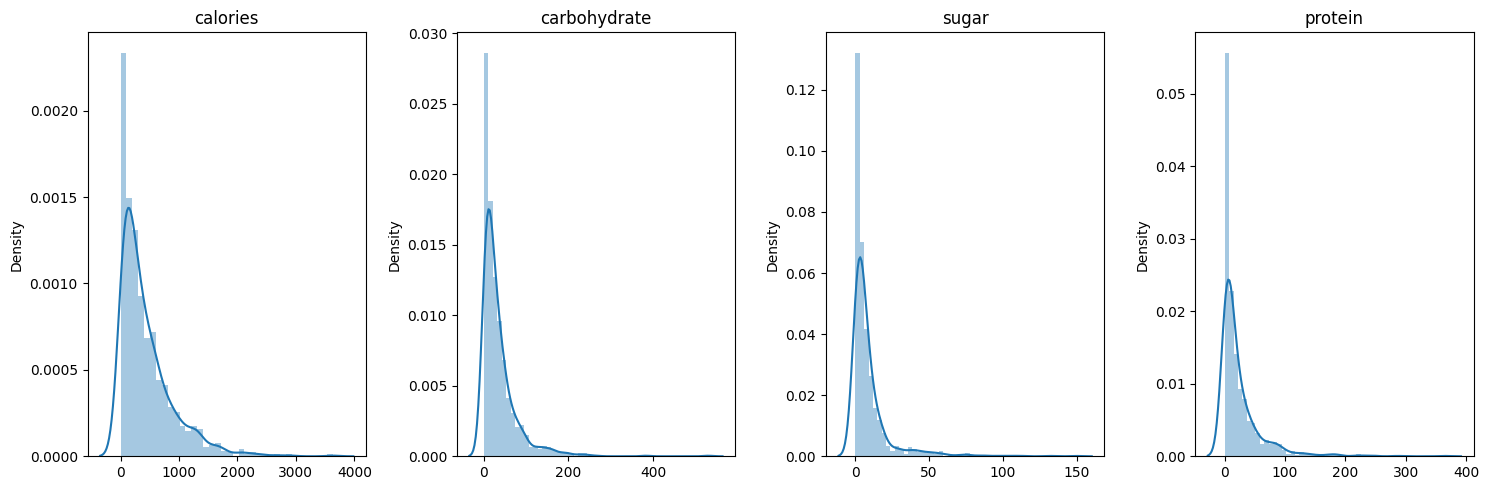

In [507]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with multiple axes
fig, axs = plt.subplots(ncols=len(num_vars), figsize=(15,5))

# Plot the distribution of each variable on its own axis
for i, var in enumerate(num_vars):
    sns.distplot(df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')
    
plt.tight_layout()
plt.show()

The histograms' `right-skewed` nature indicates that the majority of recipes tend to have lower values for the nutritional features, with a sharp drop-off and a long tail of recipes that have higher values. Taking calories as an example, most recipes have a lower number of calories, indicating that they are generally on the healthier side with fewer calories. However, there are relatively fewer recipes that have very high calorie counts, possibly representing indulgent or more energy-dense dishes. The skewness suggests that the dataset is likely to have a wide range of recipes, with a few outliers having notably higher nutritional values compared to the rest of the recipes, which could be particularly rich or calorie-dense dishes.

In [508]:
import plotly.express as px

# Creating a new DataFrame that summarizes the counts and proportions of recipes for each category
temp = df['category'].value_counts()
temp = pd.DataFrame(temp).reset_index()
temp.columns = ['category', 'num']
temp['prop'] = round(temp['num'] / df.shape[0] * 100, 2)

# Plotting the bar plot using Plotly with the custom color palette
fig = px.bar(temp, x='category', y='num', text='prop', title='Number of recipes by category')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis_title='Category', yaxis_title='Number of recipes')
fig.show()

## Multivariate Analysis

We can observe that the "One Dish" and "Pork" categories have the `smallest` proportions, accounting for **7.49%** and **8.16%** of the total recipes, respectively. On the other hand, the "Chicken" and "Breakfast" categories have the highest `proportions`, representing **18.21%** and **11.84%** of all the recipes, respectively.

In [509]:

# Create a pivot table to count the occurrences of each category by "high_traffic"
pivot_table = df.pivot_table(index='category', columns='high_traffic', aggfunc='size', fill_value=0)

# Reset index and rename columns
pivot_table = pivot_table.reset_index()
pivot_table.columns.name = None

# Melt the DataFrame to create "High" and "Low" columns
melted_df = pd.melt(pivot_table, id_vars='category', var_name='high_traffic', value_name='count')

# Plot the bar plot using Plotly
fig = px.bar(melted_df, x='category', y='count', color='high_traffic', barmode='group',
             title='Recipes by Category and High Traffic',
             labels={'category': 'Category', 'count': 'Number of Recipes', 'high_traffic': 'High Traffic'})
fig.show()

Upon conducting a comprehensive analysis of the "category" variable while considering the "high_traffic" target variable, `notable trends` have emerged. We found that certain categories exhibit a higher proportion of recipes with high traffic. These categories include Vegetable, Potato, Pork, One Dish Meal, Meat, Lunch/Snacks, and Dessert, indicating that recipes falling under these categories are more likely to attract significant attention and interest from users.

Conversely, there are categories with a notably lower proportion of recipes that garner high traffic. These categories consist of Beverages, Breakfast, and Chicken

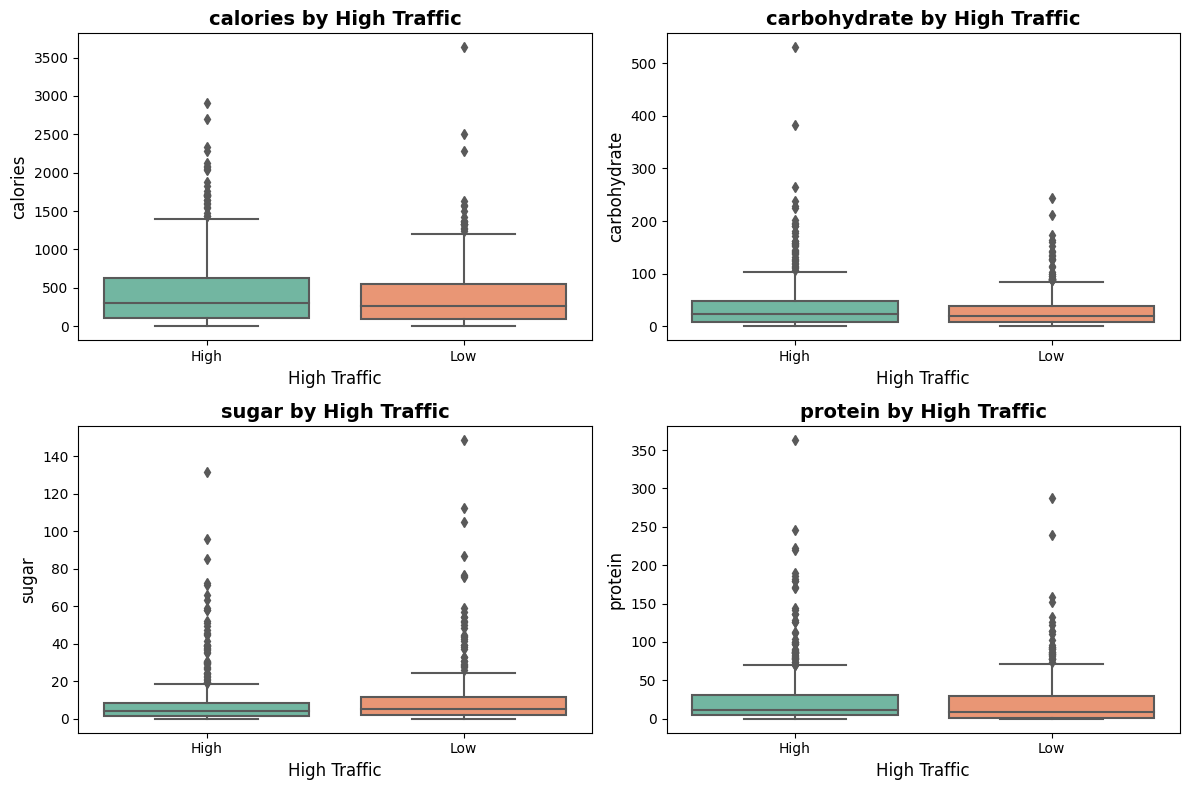

In [510]:
# Melt the DataFrame to create a single "value" column for numerical variables
melted_df = pd.melt(df, id_vars=['category', 'high_traffic'], value_vars=num_vars, var_name='variable', value_name='value')

# Plot boxplots for each numerical variable using Seaborn
plt.figure(figsize=(12, 8))
for i, variable in enumerate(num_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='high_traffic', y=variable, data=df, palette='Set2')
    plt.xlabel('High Traffic', fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.title(f'{variable} by High Traffic', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

`The medians and quartiles` of the high and low traffic groups appeared to be relatively similar. This finding suggests that the distribution of protein, sugar, calories, and carbohydrate features may not significantly influence whether a recipe attracts high traffic or not.

In essence, the box plots provide valuable insights into the `spread and central tendencies` of the nutritional variables for both traffic categories. However, the lack of substantial differences between the two groups' distributions suggests that factors other than these nutritional characteristics might play a more prominent role in determining recipe popularity and engagement on the platform.

# 🛠️ Model Development

The problem at hand can be framed as a `binary classification` task, where we aim to predict whether a recipe will lead to high traffic **(1)** or not **(0)**

In this section, we will explore the process of predictive modeling to accurately predict high traffic occurrences, aiming to achieve an **80%** success rate. Our dataset under consideration contains a combination of categorical and numerical features, which requires preprocessing to ensure effective model training. Our approach begins with `one-hot encoding` categorical data and `scaling numerical` data to bring them to a comparable scale. With the dataset prepared, we will split it into a **90%** training set and a **10%** test set, allocating a larger portion for training due to the relatively small dataset size.

To start, we will fit a simple `Logistic Regression` model as `baseline model` on the training set, allowing us to examine the model's coefficients. Based on the coefficients, we will identify and eliminate less influential features, with the objective of reducing model complexity and potentially improving performance.

With a refined feature set, the next step will involve `hyperparameter tuning` of the `XGBoost` algorithm using the Optuna library. The optimization experiment aims to maximize accuracy on the test set while considering other essential metrics like precision, recall, F1 score, and ROC AUC.

Once we obtain the best hyperparameters, we will retrain the XGBoost model using the selected configuration on the same training set. Subsequently, we will compare the performance of the optimized XGBoost model to that of the Logistic Regression model using the test set. Throughout this analysis, our primary focus will be on accurately predicting high traffic occurrences, and we will assess how well both models meet this `crucial business requirement`.

## Data Preprocessing

In [511]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# One Hot Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['category'])
df_encoded['high_traffic'] = df_encoded['high_traffic'].map({'High': 1, 'Low': 0})

# Apply StandardScaler to specified columns
columns_to_scale = ['calories', 'carbohydrate', 'sugar', 'protein']

scaler = StandardScaler()
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
df_encoded = df_encoded.drop('recipe', axis=1)

# Specify the target 'y' and features 'X'
X = df_encoded.drop('high_traffic', axis=1)
y = df_encoded['high_traffic']



## Fitting a Baseline Model

In [512]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
})

# Set the 'Metric' column as the index
metrics_table = metrics_table.set_index('Metric')

# Define a custom styling function to apply color and background to the cells
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: cyan; color: black; font-weight: bold' if v else '' for v in is_max]

# Apply the custom styling to the metrics table
styled_metrics_table = metrics_table.style.apply(highlight_max, axis=1)

# Display the styled metrics table
display(styled_metrics_table)



,Train Set,Test Set
Metric,,
Accuracy,0.759006,0.800000
Precision,0.798354,0.800000
Recall,0.801653,0.862745
F1 Score,0.800000,0.830189
ROC AUC,0.748178,0.790347


## Feature importances

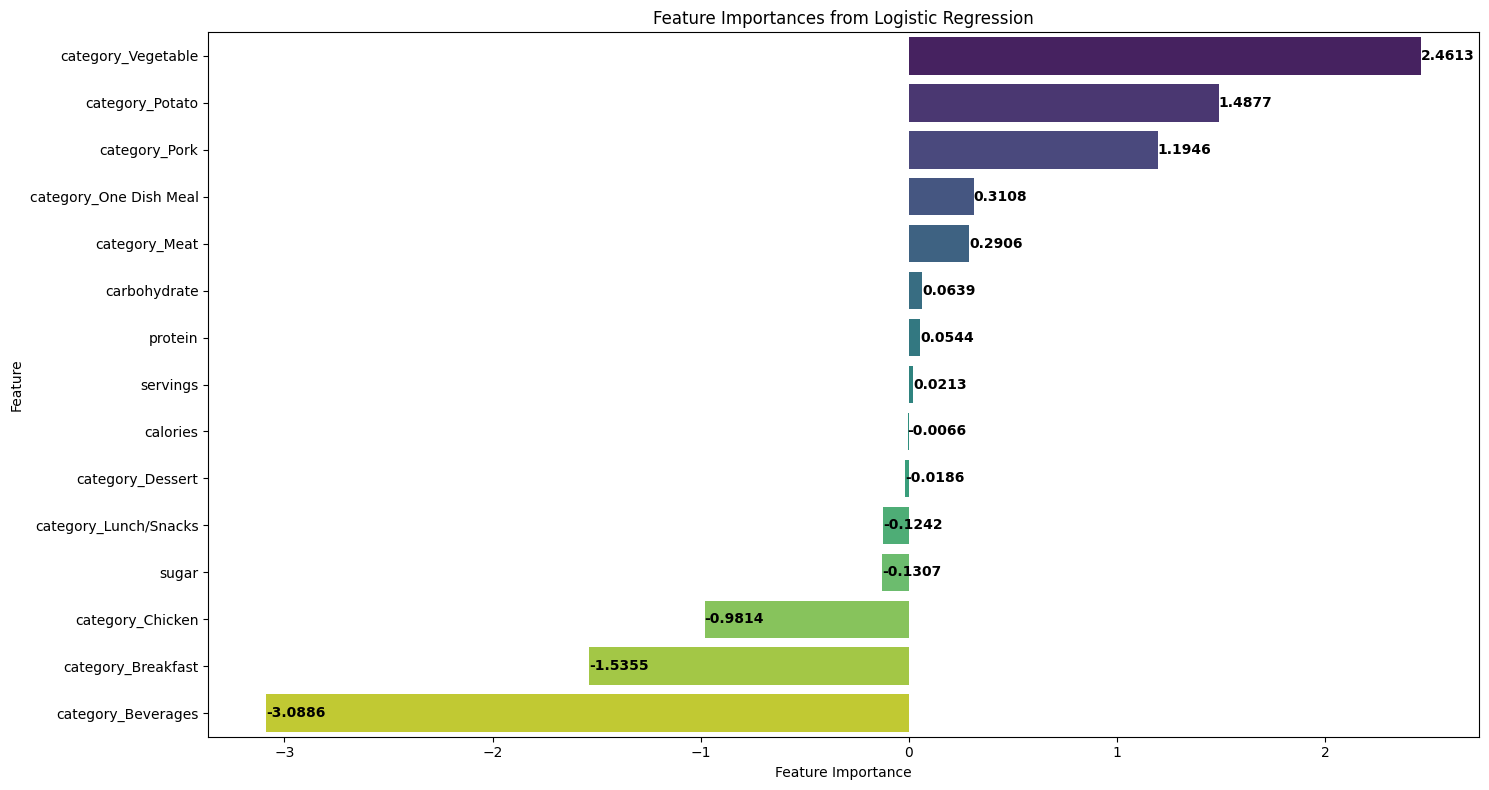

In [513]:
# Get the feature importances (coefficients) from the logistic regression model
feature_importances = logreg_model.coef_[0]

# Create a DataFrame to store the feature importances with corresponding feature names
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
# Add annotations (importance values) on the bars
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Logistic Regression')
plt.tight_layout()
plt.show()

The feature importances obtained from the logistic regression model are illustrated on the graph above. These importances indicate the strength of each feature's influence in predicting the target variable. **Positive values** denote features that **positively contribute** to the target prediction, while **negative** values indicate features that **negatively impact** the prediction.

Looking at the feature importances, we can see that `category_Vegetable` has the highest positive importance value of **2.4613**, suggesting that dishes categorized as vegetables play a significant role in predicting the target outcome. Similarly, `category_Potato` and `category_Pork` have importance values of **1.4877** and **1.1946**, respectively, indicating their substantial positive impact on the predictions.

On the other hand, `category_Beverages` has the most negative importance value of **-3.03886**, implying that dishes categorized as beverages have a significant negative influence on the predictions. Likewise, `category_Breakfast` and `category_Chicken` also have notable negative importance values of **-1.5355** and **-0.9814**, respectively, suggesting their adverse effect on the target predictions.

The rest of the features have relatively smaller importance values, implying their lesser impact on the predictions.

## Fitting a Comparaison Model : XGBoost Classifier Optimized with Optuna 

In [515]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
import optuna

# Define the objective function for Optuna optimization
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 1,
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create a Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Create and train the XGBoost classifier with the best hyperparameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_test)






[I 2023-07-21 14:01:42,026] A new study created in memory with name: no-name-0c8fa385-9ac3-48ae-9f7b-71be5c0039d4


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-07-21 14:01:42,257] Trial 0 finished with value: 0.7444444444444445 and parameters: {'lambda': 0.08690248753889739, 'alpha': 0.0012996441577692215, 'colsample_bytree': 0.9242916270249731, 'subsample': 0.42540013610517613, 'learning_rate': 0.012610379071365412, 'n_estimators': 171, 'max_depth': 3, 'min_child_weight': 9}. Best is trial 0 with value: 0.7444444444444445.
[I 2023-07-21 14:01:42,342] Trial 1 finished with value: 0.6666666666666666 and parameters: {'lambda': 0.002616723592831143, 'alpha': 0.11589379235262796, 'colsample_bytree': 0.7379537542877025, 'subsample': 0.4287476098445049, 'learning_rate': 0.0012694748533246315, 'n_estimators': 60, 'max_depth': 4, 'min_child_weight': 8}. Best is trial 0 with value: 0.7444444444444445.
[I 2023-07-21 14:01:42,701] Trial 2 finished with value: 0.6666666666666666 and parameters: {'lambda': 5.30165732390735, 'alpha': 0.09101702104637145, 'colsample_bytree': 0.6371258657268896, 'subsample': 0.5692966948844895, 'learning_rate': 0.077

## Evaluation of the XGBoost Classifier

In [519]:
# Create and train the XGBoost classifier with the best hyperparameters
params = {'lambda': 0.0024216262227453877, 'alpha': 0.006418687794179554, 'colsample_bytree': 0.9784013770010614, 'subsample': 0.9603519784327296, 'learning_rate': 0.003749893128483935, 'n_estimators': 254, 'max_depth': 5, 'min_child_weight': 1, 'random_state':1}
best_model = xgb.XGBClassifier(**params)
best_model.fit(X_train, y_train)


# Make predictions on the test set
y_train_pred = best_model.predict(X_train)
# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Create a table to display the metrics
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Train Set': [train_accuracy, train_precision, train_recall, train_f1, train_roc_auc],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
})

# Set the 'Metric' column as the index
metrics_table = metrics_table.set_index('Metric')

# Define a custom styling function to apply color and background to the cells
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: cyan; color: black; font-weight: bold' if v else '' for v in is_max]

# Apply the custom styling to the metrics table
styled_metrics_table = metrics_table.style.apply(highlight_max, axis=1)

# Display the styled metrics table
display(styled_metrics_table)

,Train Set,Test Set
Metric,,
Accuracy,0.807453,0.811111
Precision,0.810964,0.793103
Recall,0.886364,0.901961
F1 Score,0.846989,0.844037
ROC AUC,0.787419,0.797134


## Comparing the results

In the comparison between the `XGBoost` and `Logistic Regression` models, both models demonstrate respectable performance on both the train and test sets. Moreover, they both satisfy the business requirement of accurately predicting high traffic **80%** of the time. The XGBoost model generally exhibits slightly better performance across multiple metrics when compared to the Logistic Regression model. For accuracy, XGBoost achieves **81.11%** on the test set, while Logistic Regression achieves **80.00%**. Additionally, XGBoost outperforms Logistic Regression in terms of precision, achieving **79.31%** on the test set compared to **80.00%**. When considering recall, XGBoost excels further, attaining **90.20%** on the test set, while Logistic Regression achieves **86.27%**. Both models display similar F1 scores, with XGBoost achieving **84.40%** on the test set and Logistic Regression achieving **83.40%**. Overall, the XGBoost model shows promising results, indicating its potential as a strong performer in accurately predicting high traffic compared to the Logistic Regression model.

# 📈 Business Metrics 

We can consider the Recipe Popularity Rate as a pivotal `business metric` for Tasty Bytes' success in attracting and retaining website visitors. As the percentage of recipes marked as "High Traffic" out of the total number of featured recipes, this metric directly reflects the effectiveness of the recipe selection process on the homepage.

The Recipe Popularity Rate can be calculated using the formula:

$$
\text{Recipe Popularity Rate} = \frac{\text{Number of High Traffic Recipes}}{\text{Total Number of Featured Recipes}} \times 100
$$

A high Recipe Popularity Rate signifies that the chosen recipes are resonating with the website's audience and generating significant user interest. Such a positive outcome can lead to substantial benefits for Tasty Bytes, including increased website traffic, enhanced user engagement, and, most importantly, a higher likelihood of visitors converting into subscribers. This conversion potential translates to a boost in revenue and overall business growth.

On the other hand, a low Recipe Popularity Rate indicates that the current recipe selection process may not be optimally

The `initial` Recipe Popularity Rate is approximately **59.77%**. This means that, based on the provided data, about **59.77%** of the featured recipes on the homepage were marked as "High Traffic."



# 📝💡 Summary and Recommendations 

## Summary

In this analysis, we explored the relationship between recipe traffic and various factors, including nutritional features and recipe categories. Surprisingly, the medians and quartiles of high and low traffic groups were relatively similar, suggesting that nutritional variables might not be strong predictors of recipe popularity.

However, a deeper examination of recipe categories revealed intriguing patterns. Categories such as Vegetable, Potato, Pork, One Dish Meal, Meat, Lunch/Snacks, and Dessert had a higher proportion of high traffic recipes, implying that these types of dishes are more appealing to users.

Conversely, categories like Beverages, Breakfast, and Chicken showed a lower proportion of high traffic recipes, indicating that they might not generate as much interest or engagement.

For predictive modeling, we compared the performance of XGBoost and Logistic Regression. Both models achieved the business goal of accurately predicting high traffic recipes 80% of the time. However, XGBoost demonstrated slightly better performance metrics across the board, with higher accuracy, precision, recall, and F1 score.

In conclusion, while nutritional features might not be decisive factors in recipe popularity, recipe categories play a crucial role. Leveraging the insights from this analysis, Tasty Bytes can optimize its recipe selection process to showcase more recipes from high-traffic categories, potentially attracting more visitors and boosting user engagement on their platform.

## Recommendations

here are some `recommendations` to increase website traffic for Tasty Bytes:  
1. `Leverage High Traffic Categories`: Feature more recipes from categories that have demonstrated higher user engagement, such as Vegetable, Potato, and Pork recipes. Prioritizing these popular categories will attract more visitors and increase the chances of users discovering recipes they find interesting.  
2. `Enhance Recipe Features`: Add more comprehensive features related to each recipe, such as preparation time, difficulty level, nutritional information, and serving suggestions. Detailed recipe information helps users make informed choices and encourages them to explore and try new recipes.  
3. `User-Generated Content`: Implement a rating and review system that allows users to rate and provide feedback on the recipes they try. User-generated content adds credibility to recipes and builds a sense of community around the platform. Positive reviews can entice other users to try the highly rated recipes, leading to increased engagement and website traffic.

Also we can implement an `Engagement Score` metric to classify recipes as `high traffic` based on user interactions and popularity. By assigning weights to various user actions such as `clicks`, `views`, `saves`, `likes`, `shares`, and `comments`, we can calculate an `Engagement Score` that reflects the recipe's overall level of engagement. Set a threshold for the Engagement Score to classify recipes as `high traffic`


